# Intro

    This dataset contains signals correlated to increased suicide rates among different socio-economic factors. There are 2321 unique values with 12 variables. These variables include country, year, sex, age, suicides_no, population, suicides/100k pop, country-year, hdi_for_year, gdp_for_year, gdp_per_capita, and generation. HDI is a common measurement of a country’s development ranging from low human development (below 0.55) to very high human development (0.8-1.0). This .csv dataset can be accessed at https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016.
    
    A major part of data mining consists of cleaning data. As you see below, I made an effort to tidy this data, remove any redundant or missing data, and preprocess it for analysis. Columns such as country-year were redundant and after some Exploratory Data Analysis I modified certain attributes such as year, age, and sex to better fit a model. It was also important to shape this data to visualize similarities, or clusters, between certain attributes.
    
    My findings for this project came up short when determining a best fit model for this data set. The primary reason for this analysis was to find which variables are of most importance to the number of suicides and bring awareness to them, and Exploratory Data Analysis proved much more useful. A predictive model might help to anticipate any sudden increase of suicide in relation to these attributes, however, the model did poorly in predicting what I thought was the target variable (suicides/100k pop). It is safe to say that the rate of suicides around the world has very little correlation between these factors. 
    
    
    
References

United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  scipy import stats

In [2]:
suicide_rates = pd.read_csv('suicide_rates.csv')
suicide_rates.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
suicide_rates.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
#Create copy, rename columns for readability, change strings to floats, drop missing no column
scr = suicide_rates.copy()

scr.rename(columns={'suicides_no':'total_suicides',
                        'suicides/100k pop':'suicides_per_100k',
                        ' gdp_for_year ($) ':'gdp_for_year',
                        'gdp_per_capita ($)':'gdp_per_capita',
                        'HDI for year': 'HDI_for_year'}, inplace=True)

scr.gdp_for_year = scr.gdp_for_year.apply(lambda x: float(''.join(x.split(','))))
scr.drop(['HDI_for_year'],axis = 1,inplace = True)

In [6]:
#Redundant column
scr.drop(['country-year'],axis=1,inplace=True)

In [7]:
scr['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [12]:
#installation
#!pip install pycountry-convert
import pycountry_convert as pc
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

#Convert country to code, then code to continent
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [13]:
#Rename countries to fit above function
scr['country'].replace({'The Bahamas' : 'Bahamas', 'Saint Vincent and Grenadines' : 'Saint Vincent and the Grenadines', 
                        'Cabo Verde' : 'Cape Verde',
                        'Republic of Korea' : 'South Korea',
                        'Serbia':'Republic of Serbia', 
                        'HDI for year': 'HDI_for_year', 'United States' : "United States of America"}, inplace=True)

In [14]:
scr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
total_suicides       27820 non-null int64
population           27820 non-null int64
suicides_per_100k    27820 non-null float64
gdp_for_year         27820 non-null float64
gdp_per_capita       27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ MB


In [15]:
scr['continent'] = scr['country'].apply(country_to_continent)
scr.head()

,country,year,sex,age,total_suicides,population,suicides_per_100k,gdp_for_year,gdp_per_capita,generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers,Europe


In [16]:
scr['continent'].unique()

array(['Europe', 'North America', 'South America', 'Asia', 'Oceania',
       'Africa'], dtype=object)

In [22]:
by_year = scr[['year', 'country',
                       'age', 'population',
                       'total_suicides',
                       'suicides_per_100k']].groupby('year').sum()
by_year.tail()

,population,total_suicides,suicides_per_100k
year,,,
2012,1912812088,230160,11101.91
2013,1890161710,223199,10663.64
2014,1912057309,222984,10306.73
2015,1774657932,203640,8253.99
2016,132101896,15603,2147.39


In [23]:
scr = scr.query('year != 2016')

# Data Analysis

In [3]:
suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In total there are 27820 entries and 12 columns. Suicides_no is the total number of suicides within the country - suicides/100k pop proves to be much more useful due to being a higher level of measurement (ratio). 

In [25]:
scr[['total_suicides', 'population', 'suicides_per_100k', 'gdp_for_year', 'gdp_per_capita']].describe()

,total_suicides,population,suicides_per_100k,gdp_for_year,gdp_per_capita
count,27660.000000,2.766000e+04,27660.000000,2.766000e+04,27660.000000
mean,243.413485,1.850689e+06,12.812597,4.471009e+11,16815.568330
std,904.490185,3.920658e+06,18.972063,1.457574e+12,18861.585497
min,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,3.000000,9.753525e+04,0.910000,8.976208e+09,3436.000000
50%,25.000000,4.307250e+05,5.980000,4.801361e+10,9283.000000
75%,132.000000,1.491041e+06,16.602500,2.602024e+11,24796.000000
max,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


When comparing just the numerical values, we can spot a few difficulties with this data. The variance between these attributes is incredibly high due to all the different countries in our data set - the population and gdp of one country may be ten times larger or smaller than one, but with the same total suicides. 

In [28]:
scr.describe(include='all')

,country,year,sex,age,total_suicides,population,suicides_per_100k,gdp_for_year,gdp_per_capita,generation,continent
count,27660,27660.000000,27660,27660,27660.000000,2.766000e+04,27660.000000,2.766000e+04,27660.000000,27660,27660
unique,100,NaN,2,6,NaN,NaN,NaN,NaN,NaN,6,6
top,Austria,NaN,female,55-74 years,NaN,NaN,NaN,NaN,NaN,Generation X,Europe
freq,372,NaN,13830,4610,NaN,NaN,NaN,NaN,NaN,6376,11328
mean,NaN,2001.173102,NaN,NaN,243.413485,1.850689e+06,12.812597,4.471009e+11,16815.568330,NaN,NaN
std,NaN,8.418754,NaN,NaN,904.490185,3.920658e+06,18.972063,1.457574e+12,18861.585497,NaN,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000,NaN,NaN
25%,NaN,1994.000000,NaN,NaN,3.000000,9.753525e+04,0.910000,8.976208e+09,3436.000000,NaN,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.307250e+05,5.980000,4.801361e+10,9283.000000,NaN,NaN
75%,NaN,2008.000000,NaN,NaN,132.000000,1.491041e+06,16.602500,2.602024e+11,24796.000000,NaN,NaN


In [26]:
by_age_sex = scr.groupby(by=['age','sex'])['total_suicides'].sum().unstack().reset_index().melt(id_vars='age')
by_age_sex

,age,sex,value
0,15-24 years,female,175199
1,25-34 years,female,208450
2,35-54 years,female,505001
3,5-14 years,female,16997
4,55-74 years,female,428917
5,75+ years,female,221442
6,15-24 years,male,632148
7,25-34 years,male,913392
8,35-54 years,male,1941374
9,5-14 years,male,35267


## Figure 2.1 Shows box-plot of all countries by total suicides

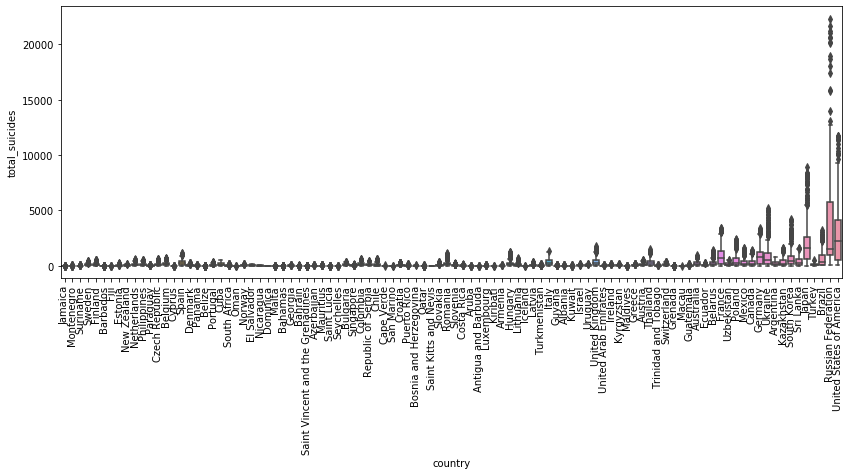

In [31]:
plt.figure(figsize = (14,5))
all_countries = scr.sort_values(by= 'total_suicides',ascending = True) 
sns.boxplot(x='country', y = 'total_suicides',data = all_countries);
plt.xticks(rotation = 90);# rotates the country names

When comparing the distribution of total suicides, we can see some abnormalities between the top of the list. Russia is incredibly unbalanced, and the US has quite a few high outliers - this can prove that the data for these two may not be as relevant as we would hope.

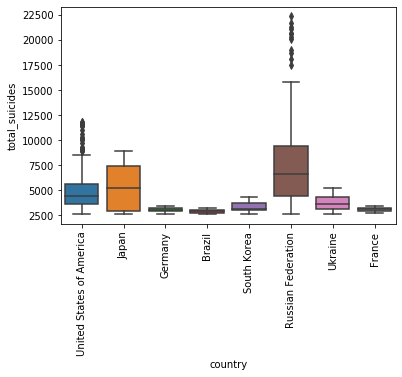

In [33]:
top_countries = scr.sort_values(by= 'total_suicides',ascending = True) 
sns.boxplot(x='country', y = 'total_suicides',data = top_countries[-500:]); 
plt.xticks(rotation = 90);

## Figure 2.2 shows box-plot of suicides per 100k population by continent 

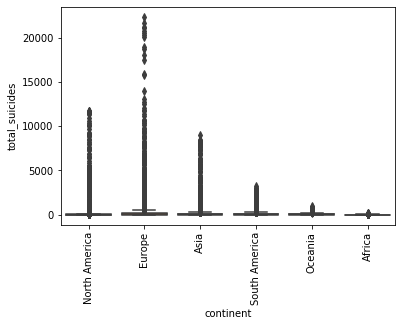

In [42]:
by_continent = scr.sort_values(by= 'suicides_per_100k',ascending = True) 
sns.boxplot(x='continent', y = 'total_suicides',data = by_continent); 
plt.xticks(rotation = 90);

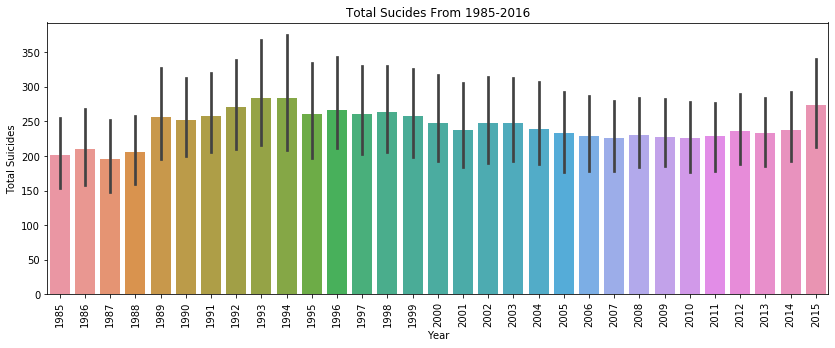

In [34]:
plt.figure(figsize = (14,5))
sns.barplot(x='year',y ='total_suicides',data = scr);
plt.xticks(rotation=90);

#For making much clear of the axis and table names
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Total Sucides From 1985-2016');


## Figure 2.3 shows bar plot of suicides per 100k population by year

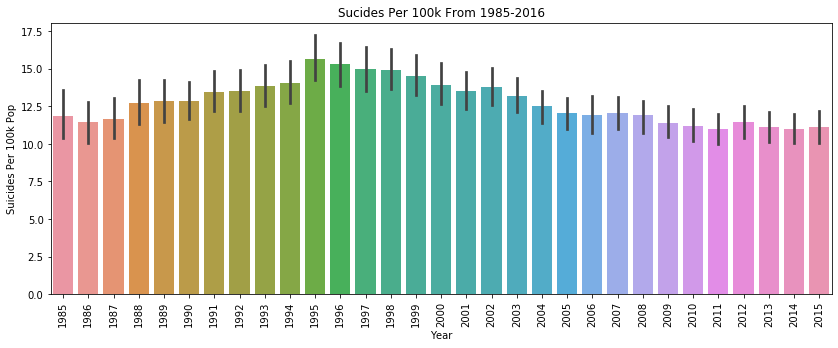

In [35]:
plt.figure(figsize = (14,5))
sns.barplot(x='year',y ='suicides_per_100k',data = scr);
plt.xticks(rotation=90);

#labels
plt.xlabel('Year')
plt.ylabel('Suicides Per 100k Pop')
plt.title('Sucides Per 100k From 1985-2016');


If we take a look at the barplot of total suicides from 1985-2016, we might think that rate of suicide is only increasing by the year. However, the population of a country is vastly growing, and by comparing it with an attribute of suicides per 100k population we see that is actually decreasing. 

## Figure 2.4 shows bar plot of suicides per 100k population by continent

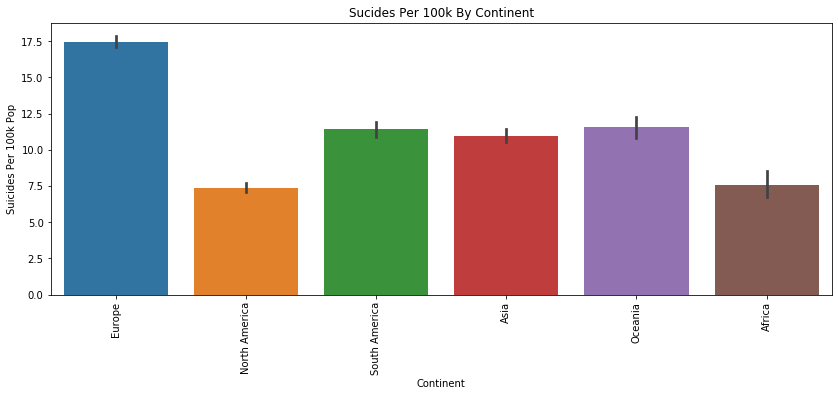

In [40]:
plt.figure(figsize = (14,5))
sns.barplot(x='continent',y ='suicides_per_100k',data = scr);
plt.xticks(rotation=90);

#labels
plt.xlabel('Continent')
plt.ylabel('Suicides Per 100k Pop')
plt.title('Sucides Per 100k By Continent');


After some conversion, I was able to visualize the rate of suicides by continent. Since there may be some trouble gathering data from so many countries, or just unreliable sources, a simplified graph of the world would be much easier to visualize our data. There seems to be a serious health concern in Europe, and by discussing this problem we can aim policies and strategies to attack this issue. 

## Figure 2.5 shows box and whisker plot of suicides per 100k sorted by age

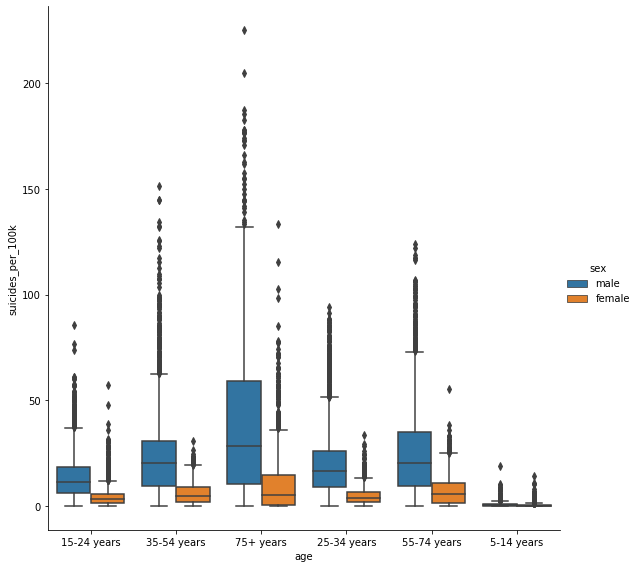

In [37]:
# use a third variable
sns.catplot(x="age", y="suicides_per_100k", hue="sex", kind="box", data=scr, height=8);

By graphing this data sorted by age and sex, we can better visualize the distribution of our data set. There seems to be an alarming number of 75+ year olds, as well as 55-74 year olds, with serious health problems. One other thing to note is the drastically higher number of male victims vs female victims - it is difficult to ignore the disparity between the two. With this knowledge, we can look to provide better assistance targeted for males. 

## Figure 2.6 shows correlation heatmap of variables

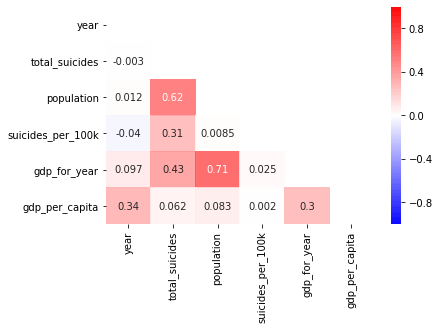

In [38]:
# Compute the correlation matrix
corr = scr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(scr.corr(),
            vmin=-1,vmax=1,alpha=0.8,
            cmap='bwr',
            annot=True, mask=mask);

There is very little to note in this heatmap - weak correlations between key variables. Gdp, population, and victims per 100k population are inherently correlated numbers. This goes for population and gdp by the year. 

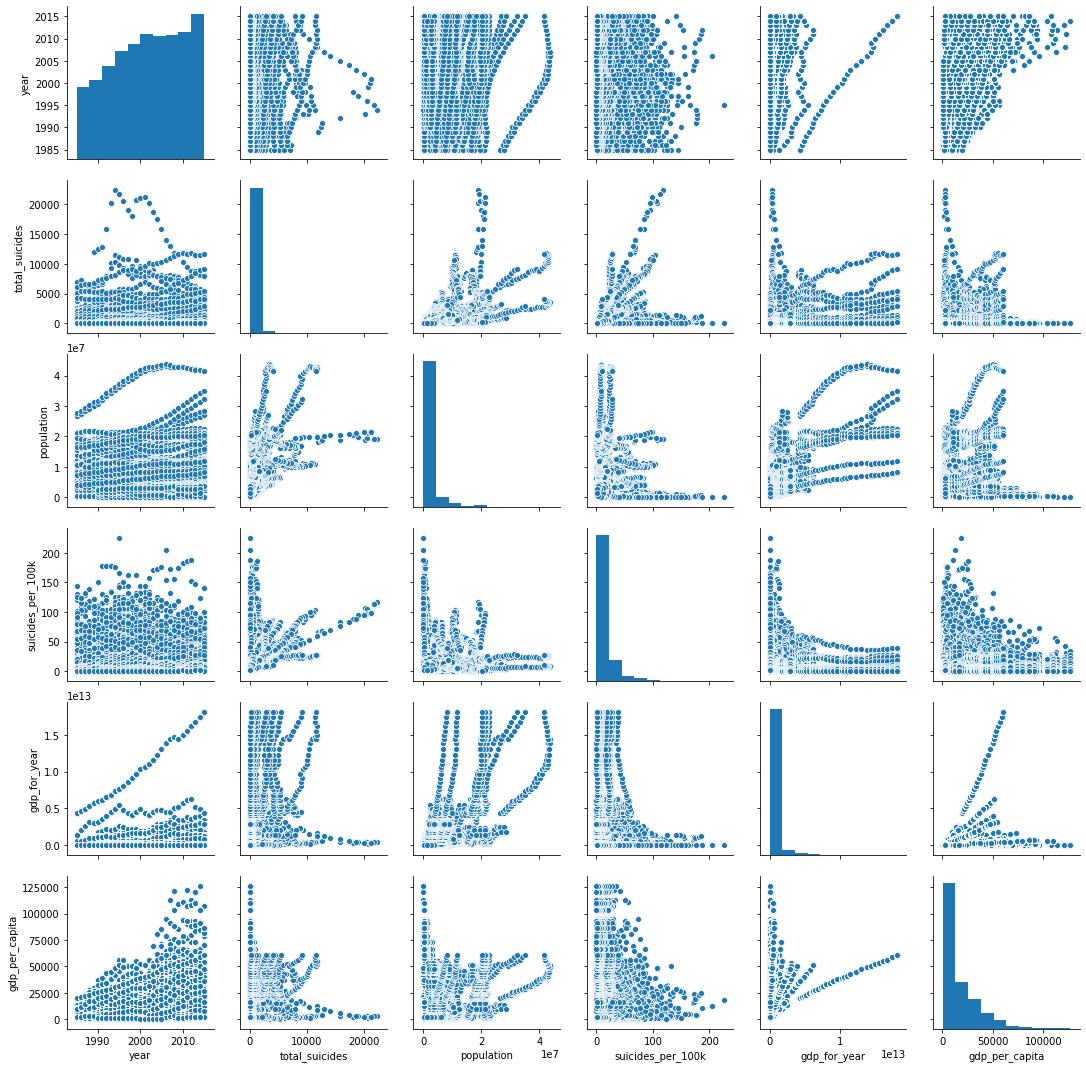

In [39]:
g = sns.pairplot(scr)

# Modeling


Before I model my data set, I must perform some preprocessing steps - sex, age, year, and country are very difficult to deal with in my modeling approach. Since this is not a form of classification, and the only target variable I can look for is continuous, I will approach this with a multivariate regression model. This way, I may be able to accurately predict the rate of victims by these socio-economic attributes. 

## Converting variables to better fit a model

In [50]:
scr_model = scr.copy()

In [43]:
genders = {"male": 0, "female": 1}

scr_model['sex'] = scr['sex'].map(genders)

In [44]:
scr['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [46]:
ages = {'15-24 years': 1, '35-54 years': 3, '75+ years': 5, '25-34 years': 2,
       '55-74 years': 4, '5-14 years': 0}

scr_model['age'] = scr['age'].map(ages)

In [51]:
scr_model['continent'].unique()

array(['Europe', 'North America', 'South America', 'Asia', 'Oceania',
       'Africa'], dtype=object)

In [52]:
continents = {'Europe': 0, 'North America': 1, 'South America': 2, 'Asia': 3, 'Oceania': 4,
       'Africa': 5}

scr_model['continent'] = scr['continent'].map(continents)

In [53]:
scr_model.head()

,country,year,sex,age,total_suicides,population,suicides_per_100k,gdp_for_year,gdp_per_capita,generation,continent
0,Albania,1987,0,1,21,312900,6.71,2.156625e+09,796,Generation X,0
1,Albania,1987,0,3,16,308000,5.19,2.156625e+09,796,Silent,0
2,Albania,1987,1,1,14,289700,4.83,2.156625e+09,796,Generation X,0
3,Albania,1987,0,5,1,21800,4.59,2.156625e+09,796,G.I. Generation,0
4,Albania,1987,0,2,9,274300,3.28,2.156625e+09,796,Boomers,0


## Drop, bin, and split data for modeling process

In [70]:
scr_model = scr_model.drop(['country'], axis=1)

In [71]:
scr_model = scr_model.drop(['generation'], axis=1)

In [72]:
X = scr_model.drop(columns=['suicides_per_100k'])
y = scr_model['suicides_per_100k']
scr_model.sample(5)

,year,sex,age,total_suicides,population,suicides_per_100k,gdp_for_year,gdp_per_capita,continent
20633,1991,1,3,161,2938000,5.48,2.899868e+10,1351,0
23524,2015,1,5,2,615701,0.32,3.177410e+11,6403,5
553,2013,1,2,0,7397,0.00,1.192925e+09,13287,1
5157,2005,0,5,165,772032,21.37,1.169358e+12,38218,1
17103,1988,0,4,235,1145800,20.51,2.585678e+11,18661,0


In [90]:
bins = [0, 1995, 2005, 2015]
group_names = [0,1,2]
scr_model['year'] = pd.cut(scr_model['year'], bins, labels=group_names)

In [93]:
scr_model['year'].value_counts()

1    9960
2    9840
0    7860
Name: year, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 10 )

In [111]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(x_train , y_train)
y_pred = linreg.predict(x_test)
y_pred.shape

(8298,)

## Modeling Results

The performance of this model did very poorly, and it is not a great fit for this data set. The rate of victims cannot be accurately predicted by age, sex, country, and gdp. After principal component analysis, and recursive feature elimination, I only reached an r-squared value of .378, mean-squared-error of 205.14, and root-mean-squared-error of 14.32. This r-squared value is the proportion of the variance in the dependent variable that is predictable from the independent variable, and 38% is very low. 

In [112]:
from sklearn import metrics
print('R2 :', metrics.r2_score(y_test,y_pred).round(2))
print('MSE :', metrics.mean_squared_error(y_test,y_pred).round(2))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)).round(2))

R2 : 0.38
MSE : 204.95
RMSE : 14.32


In [113]:
# scale the data to make all features relative to each other
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(x_train)

In [114]:
# n_features_to_select=
from sklearn.feature_selection import RFE
# Construct RFE model, select top 6
rfe = RFE(linreg,n_features_to_select=6)
# fit the RFE model
rfe.fit(scaled_x_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=6, step=1, verbose=0)

In [115]:
rfe.ranking_

array([3, 1, 1, 1, 1, 1, 2, 1])

In [116]:
X_test_RFE = x_test[x_test.columns[rfe.support_]]
X_train_RFE = x_train[x_train.columns[rfe.support_]]

In [117]:
linreg.fit(X_train_RFE , y_train)
y_pred = linreg.predict(X_test_RFE)

In [118]:
print('R2 :', metrics.r2_score(y_test,y_pred).round(3))
print('MSE :', metrics.mean_squared_error(y_test,y_pred).round(2))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)).round(2))

R2 : 0.378
MSE : 205.14
RMSE : 14.32


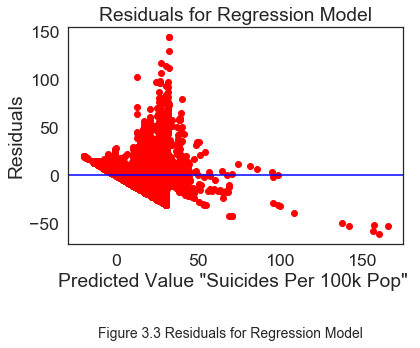

In [145]:
plt.scatter(y_pred , (y_test - y_pred) , color='red')
plt.title("Residuals for Regression Model")
plt.xlabel("Predicted Value \"Suicides Per 100k Pop\" ")
plt.ylabel("Residuals")
plt.axhline(y=0.0, color='blue', linestyle='-')
txt="Figure 3.3 Residuals for Regression Model" 
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

Residuals for regression model show a non-random pattern - which means this model is not a good fit for this data set. 

# Conclusion

    In conclusion, this data set proved to be much more valuble in its visualization than its modeling. A lot of preprocessing was needed to even fit a modeling approach, and much of the important information may have been lost in the process. This data set came with many inherent challenges for this task due to its broad range of categorical and numerical data. If I were to do anything different it would be much more feature selection and extraction - dimension reduction is an extremely useful machine learning process to reduce the number of random variables under consideration in this data set. If I can somehow categorize the data of victims and run a classification model on at-risk levels, maybe I can come up with a better model to anticipate locations that are susceptible to mental health problems.
    
    I truly believe that this dataset, in just its visualization, is enough to lessen the stigma that is often associated with these concerns. Only then can we better assist those who are too afraid to speak out before it's too late.